In [1]:
from netCDF4 import Dataset
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import xarray as xr
from xgcm import Grid
import numpy as np
import cmocean
import warnings
warnings.filterwarnings("ignore")
print('done')

done


In [2]:
##Unparameterized run
%cd /glade/p/univ/unyu0004/eyankovsky/MEKE_testing/default_noparameterization
fs_05 = xr.open_dataset('static.nc', decode_times=False)
os_05 = xr.open_dataset('ocean.stats.nc', decode_times=False)
av_05 = xr.open_dataset('averages_00031502.nc', decode_times=False)  


##TRUTH CASE:
%cd /glade/p/univ/unyu0004/gmarques/NeverWorld2/baselines/nw2_0.03125deg_N15_baseline_hmix5
av_truth = xr.open_dataset('averages_00002702.nc', decode_times=False)  


%cd /glade/scratch/eyankovsky/Backscatter_tests_with_Scott/Half_degree/Jansen_EBT_test2/
av_BS = xr.open_dataset('averages_00031502.nc', decode_times=False)
os_BS = xr.open_dataset('ocean.stats.nc', decode_times=False)

# %cd /glade/scratch/eyankovsky/Backscatter_tests_with_Scott/Half_degree/Bachman_EBT_test4/
# testEBT2 = xr.open_dataset('averages_00031502.nc', decode_times=False)
# ostestEBT2= xr.open_dataset('ocean.stats.nc', decode_times=False)


/glade/p/univ/unyu0004/eyankovsky/MEKE_testing/default_noparameterization
/glade/campaign/univ/unyu0004/NeverWorld2/nw2_0.03125deg_N15_baseline_hmix5
/glade/scratch/eyankovsky/Backscatter_tests_with_Scott/Half_degree/Jansen_EBT_test2


In [3]:
##Stratification comparison
index=90
Layer = np.array(os_05['Layer']);
yh = av_05.yh
xh = av_05.xh
yh_hr=av_truth.yh

h_05 = np.nanmean(np.array(av_05['h'][:,:,:,index]),axis=0)
eta_05 = np.zeros((len(Layer)+1,280));


h_truth = np.nanmean(np.array(av_truth['h'][:,:,:,index*16].coarsen(yh=16, boundary="exact").mean()),axis=0)
eta_truth = np.zeros((len(Layer)+1,280));

h_BS = np.nanmean(np.array(av_BS['h'][:,:,:,index]),axis=0)
eta_BS = np.zeros((len(Layer)+1,280));



for i in range(1,len(Layer)+1):
    eta_05[i,:]=np.nansum(h_05[0:i,:],axis=0)
    eta_truth[i,:]=np.nansum(h_truth[0:i,:],axis=0)
    eta_BS[i,:]=np.nansum(h_BS[0:i,:],axis=0)

print('done')

done


In [4]:
eta_05.shape

(16, 280)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


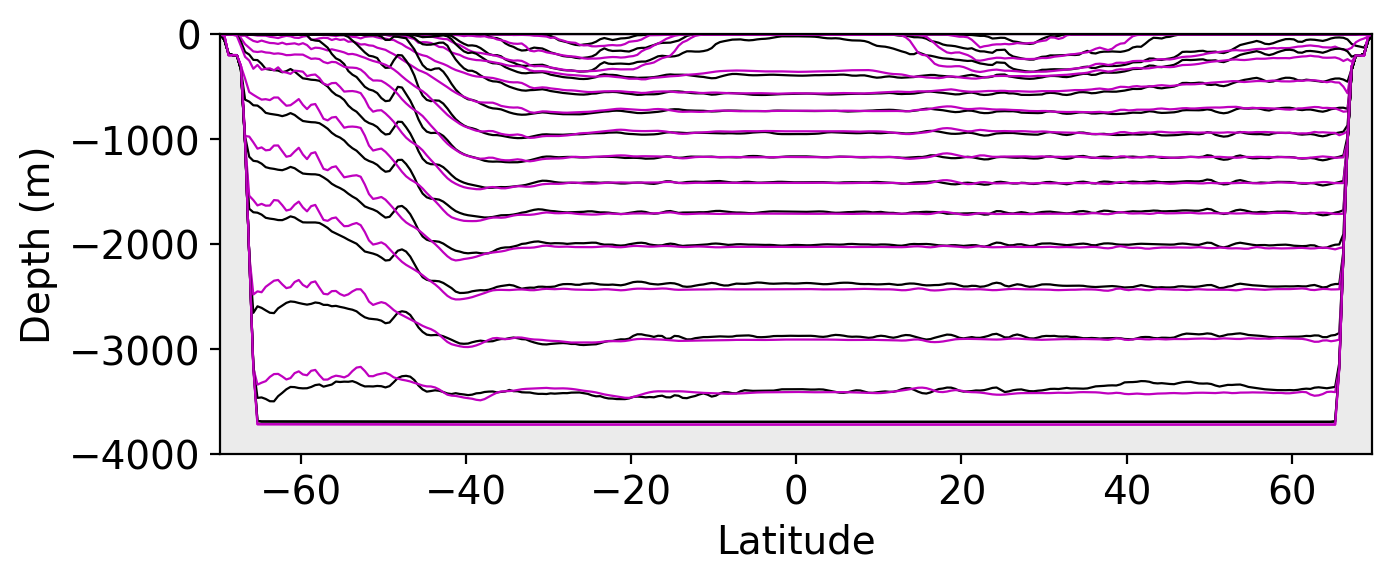

In [5]:
fig = plt.figure(figsize=(12, 3), dpi= 200, facecolor='w', edgecolor='k')
ax1 = fig.add_axes([0.15,0.2,0.6,0.7]) 
ax1.set_facecolor((0.92, 0.92, 0.92))
ax1.set_xlabel('Latitude',fontsize=14)
ax1.set_ylabel('Depth (m)',fontsize=14)
ax1.tick_params(labelsize=14); 

plotted =ax1.pcolor(yh,-eta_05,np.zeros([15,280]),cmap='Greys')

#for i in range(0,10,1):

for i in range(0,len(Layer)+1,1):
    line,=ax1.plot(yh,-eta_truth[i,:],color='k',linewidth=.8) 
    line,=ax1.plot(yh,-eta_BS[i,:],color='m',linewidth=.8)

    print(i)

#FOR LEGEND CREATION ONLY:
line,=ax1.plot(yh,-eta_truth[15,:],color='k',linewidth=.8,label='Coarsened 1/32$^\circ$ truth')
line,=ax1.plot(yh,-eta_BS[15,:],color='m',linewidth=.8,label='1/2$^\circ$  Parameterized')

# Shrink current axis by 20%
box = ax1.get_position()
ax1.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
#ax1.legend(loc='lower right', bbox_to_anchor=(.35, 1))
ax1.set_ylim([-4000,0])
#ax1.set_ylim([-500,0])

plt.show()

0
1
2
3
4


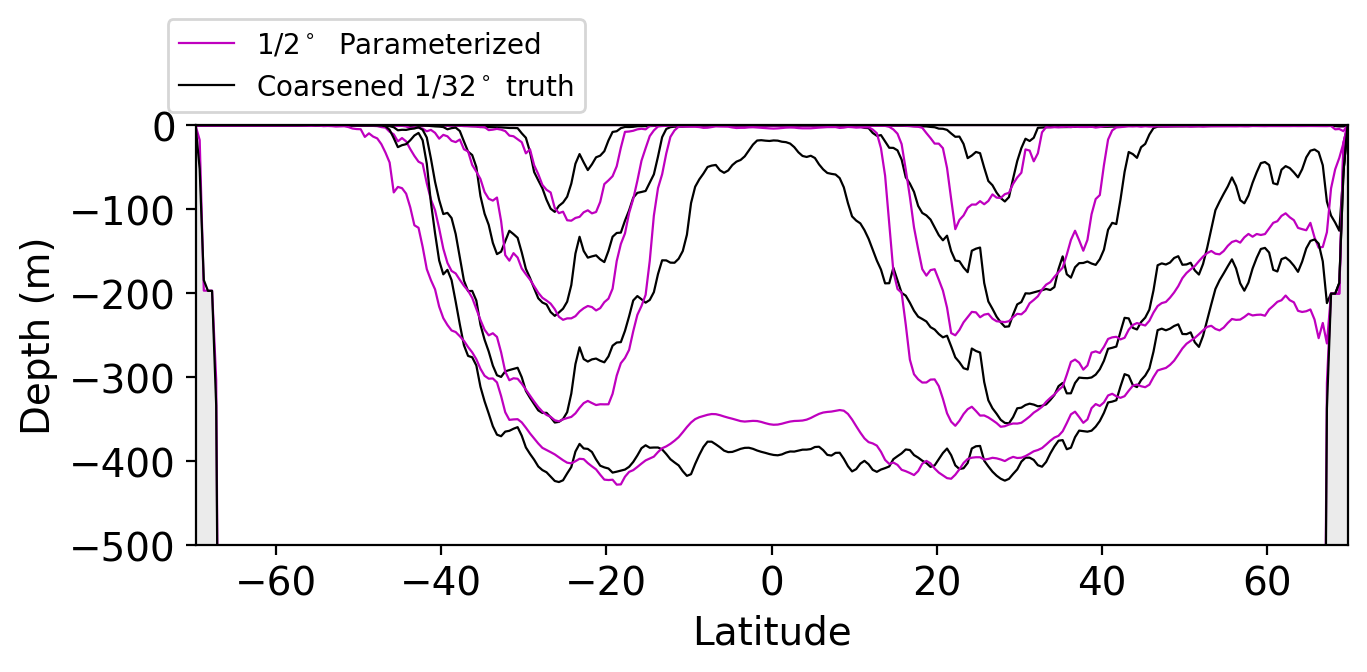

In [10]:
fig = plt.figure(figsize=(12, 3), dpi= 200, facecolor='w', edgecolor='k')
ax1 = fig.add_axes([0.15,0.2,0.6,0.7]) 
ax1.set_facecolor((0.92, 0.92, 0.92))
ax1.set_xlabel('Latitude',fontsize=14)
ax1.set_ylabel('Depth (m)',fontsize=14)
ax1.tick_params(labelsize=14); 

plotted =ax1.pcolor(yh,-eta_05,np.zeros([15,280]),cmap='Greys')


for i in range(0,5):
    line,=ax1.plot(yh,-eta_truth[i,:],color='k',linewidth=.8) 
    line,=ax1.plot(yh,-eta_BS[i,:],color='m',linewidth=.8)

    print(i)

#FOR LEGEND CREATION ONLY:
line,=ax1.plot(yh,-eta_BS[15,:],color='m',linewidth=.8,label='1/2$^\circ$  Parameterized')

line,=ax1.plot(yh,-eta_truth[15,:],color='k',linewidth=.8,label='Coarsened 1/32$^\circ$ truth')

# Shrink current axis by 20%
box = ax1.get_position()
ax1.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax1.legend(loc='lower right', bbox_to_anchor=(.35, 1))
ax1.set_ylim([-500,0])

plt.show()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


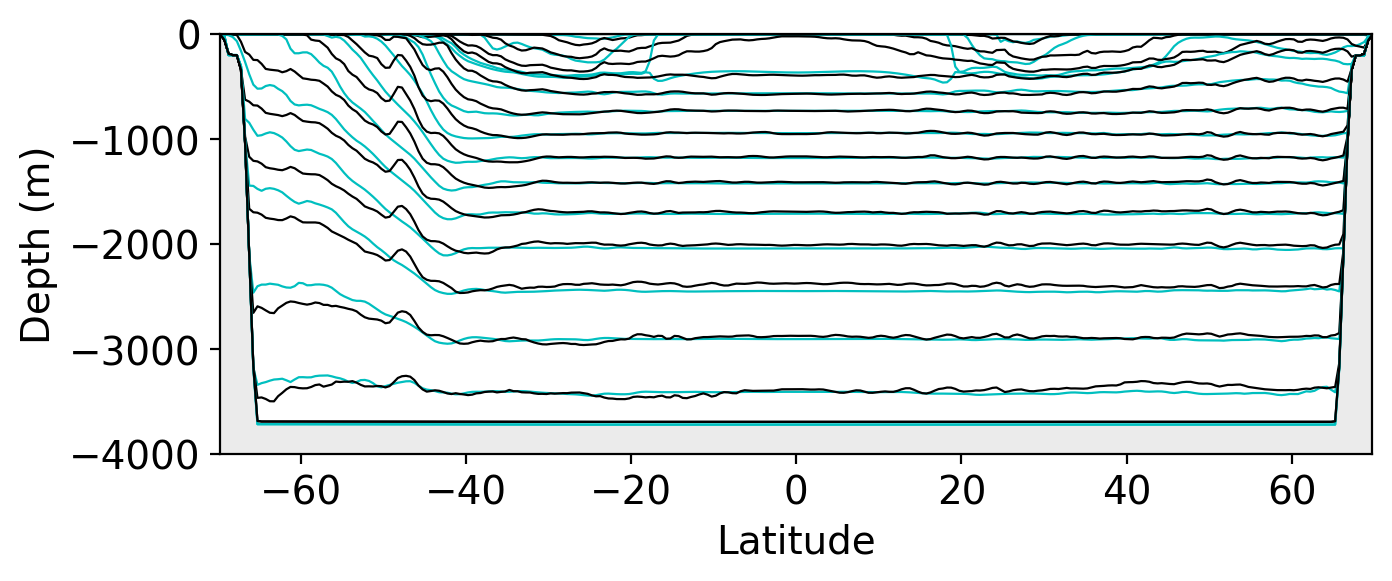

In [34]:
fig = plt.figure(figsize=(12, 3), dpi= 200, facecolor='w', edgecolor='k')
ax1 = fig.add_axes([0.15,0.2,0.6,0.7]) 
ax1.set_facecolor((0.92, 0.92, 0.92))
ax1.set_xlabel('Latitude',fontsize=14)
ax1.set_ylabel('Depth (m)',fontsize=14)
ax1.tick_params(labelsize=14); 

plotted =ax1.pcolor(yh,-eta_05,np.zeros([15,280]),cmap='Greys')

#for i in range(0,10,1):

for i in range(0,len(Layer)+1,1):
    line,=ax1.plot(yh,-eta_05[i,:],color='c',linewidth=.8) 
    line,=ax1.plot(yh,-eta_truth[i,:],color='k',linewidth=.8) 
    print(i)

#FOR LEGEND CREATION ONLY:
line,=ax1.plot(yh,-eta_05[15,:],color='c',linewidth=.8,label='No parameterization')
line,=ax1.plot(yh,-eta_truth[15,:],color='k',linewidth=.8,label='Coarsened 1/32$^\circ$ truth')

# Shrink current axis by 20%
box = ax1.get_position()
ax1.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
#ax1.legend(loc='lower right', bbox_to_anchor=(.35, 1))
ax1.set_ylim([-4000,0])

plt.show()


0
1
2
3
4


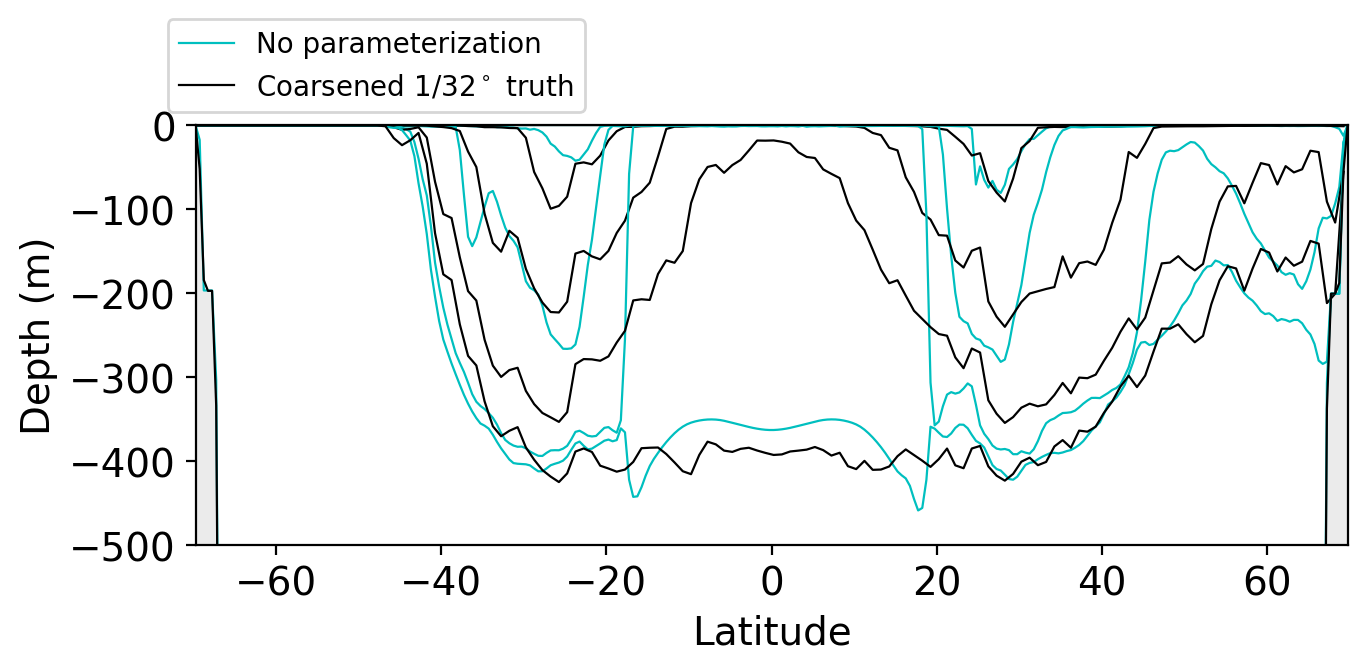

In [38]:
fig = plt.figure(figsize=(12, 3), dpi= 200, facecolor='w', edgecolor='k')
ax1 = fig.add_axes([0.15,0.2,0.6,0.7]) 
ax1.set_facecolor((0.92, 0.92, 0.92))
ax1.set_xlabel('Latitude',fontsize=14)
ax1.set_ylabel('Depth (m)',fontsize=14)
ax1.tick_params(labelsize=14); 

plotted =ax1.pcolor(yh,-eta_05,np.zeros([15,280]),cmap='Greys')

#for i in range(0,10,1):

for i in range(0,5):
    line,=ax1.plot(yh,-eta_05[i,:],color='c',linewidth=.8) 
    line,=ax1.plot(yh[::2],-eta_truth[i,::2],color='k',linewidth=.8) 
    print(i)

#FOR LEGEND CREATION ONLY:
line,=ax1.plot(yh,-eta_05[15,:],color='c',linewidth=.8,label='No parameterization')
line,=ax1.plot(yh,-eta_truth[15,:],color='k',linewidth=.8,label='Coarsened 1/32$^\circ$ truth')

# Shrink current axis by 20%
box = ax1.get_position()
ax1.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax1.legend(loc='lower right', bbox_to_anchor=(.35, 1))
ax1.set_ylim([-500,0])

plt.show()

8
9
10
11
12
13
14
15


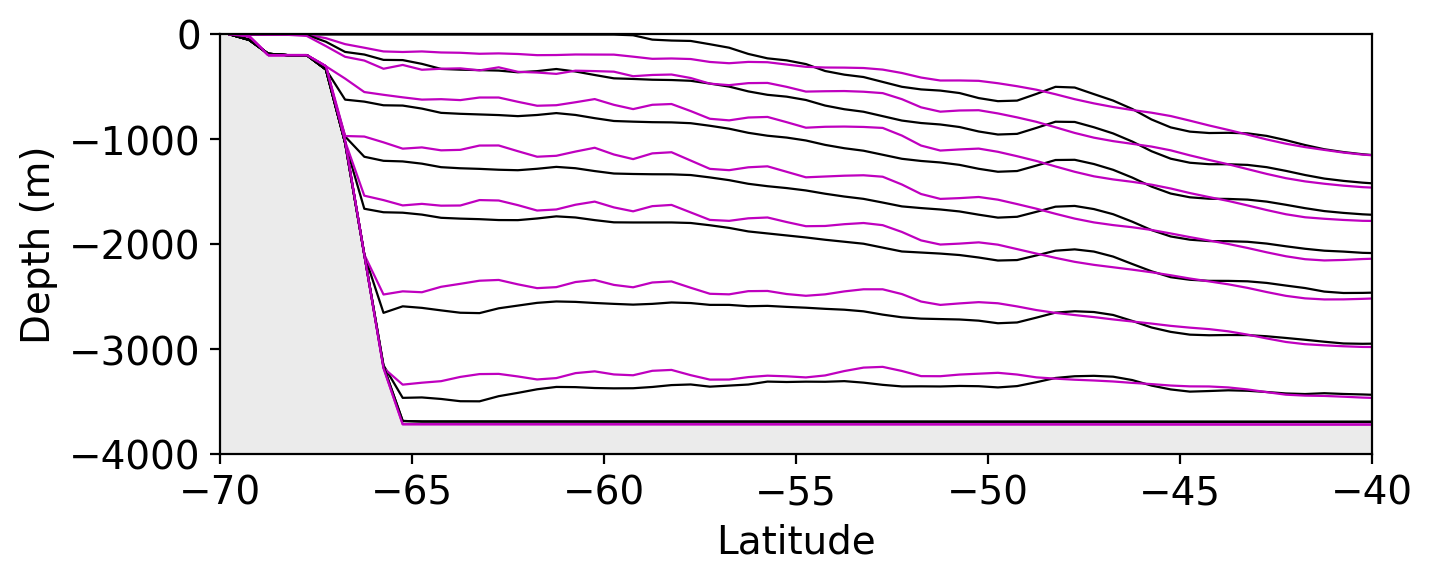

In [12]:
fig = plt.figure(figsize=(12, 3), dpi= 200, facecolor='w', edgecolor='k')
ax1 = fig.add_axes([0.15,0.2,0.6,0.7]) 
ax1.set_facecolor((0.92, 0.92, 0.92))
ax1.set_xlabel('Latitude',fontsize=14)
ax1.set_ylabel('Depth (m)',fontsize=14)
ax1.tick_params(labelsize=14); 

plotted =ax1.pcolor(yh,-eta_05,np.zeros([15,280]),cmap='Greys')

#for i in range(0,10,1):

for i in range(8,len(Layer)+1,1):
    line,=ax1.plot(yh,-eta_truth[i,:],color='k',linewidth=.8) 
    line,=ax1.plot(yh,-eta_BS[i,:],color='m',linewidth=.8)

    print(i)

#FOR LEGEND CREATION ONLY:
line,=ax1.plot(yh,-eta_truth[15,:],color='k',linewidth=.8,label='Coarsened 1/32$^\circ$ truth')
line,=ax1.plot(yh,-eta_BS[15,:],color='m',linewidth=.8,label='1/2$^\circ$  Parameterized')

# Shrink current axis by 20%
box = ax1.get_position()
ax1.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
#ax1.legend(loc='lower right', bbox_to_anchor=(.35, 1))
ax1.set_ylim([-4000,0])
ax1.set_xlim([-70,-40])

plt.show()

9
10
11
12
13
14
15


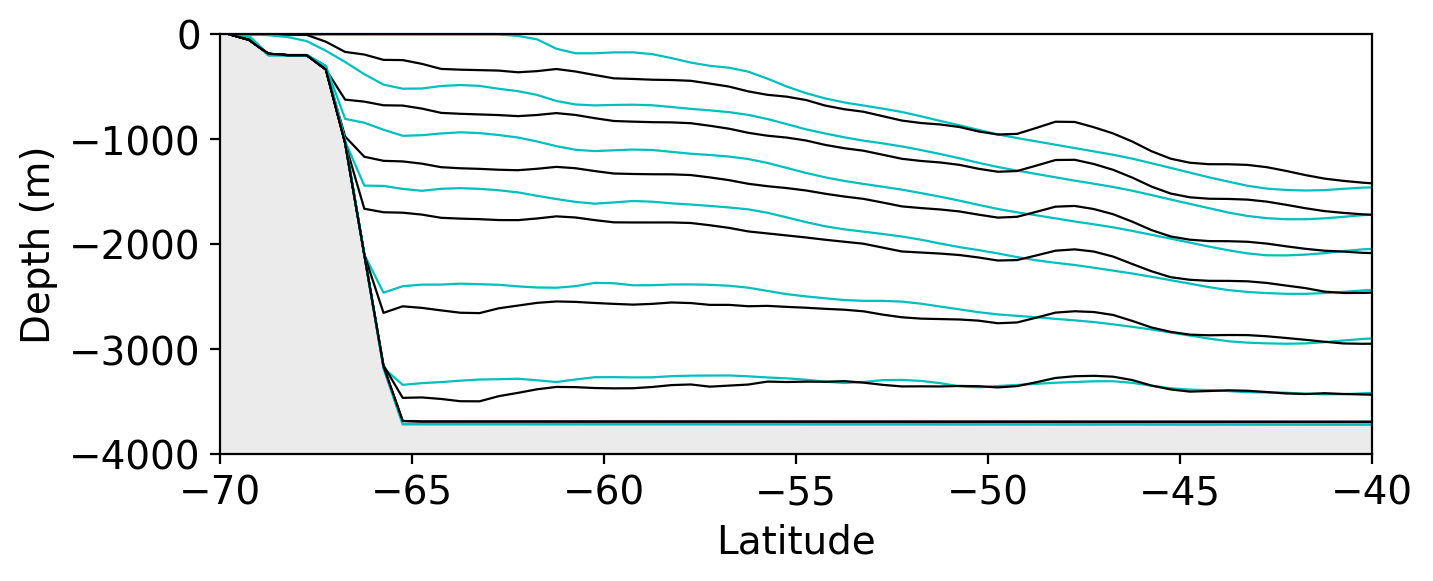

In [39]:
fig = plt.figure(figsize=(12, 3), dpi= 200, facecolor='w', edgecolor='k')
ax1 = fig.add_axes([0.15,0.2,0.6,0.7]) 
ax1.set_facecolor((0.92, 0.92, 0.92))
ax1.set_xlabel('Latitude',fontsize=14)
ax1.set_ylabel('Depth (m)',fontsize=14)
ax1.tick_params(labelsize=14); 

plotted =ax1.pcolor(yh,-eta_05,np.zeros([15,280]),cmap='Greys')

#for i in range(0,10,1):

for i in range(9,len(Layer)+1,1):
    line,=ax1.plot(yh,-eta_05[i,:],color='c',linewidth=.8) 
    line,=ax1.plot(yh,-eta_truth[i,:],color='k',linewidth=.8) 
    print(i)

#FOR LEGEND CREATION ONLY:
line,=ax1.plot(yh,-eta_05[15,:],color='c',linewidth=.8,label='No parameterization')
line,=ax1.plot(yh,-eta_truth[15,:],color='k',linewidth=.8,label='Coarsened 1/32$^\circ$ truth')

# Shrink current axis by 20%
box = ax1.get_position()
ax1.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
#ax1.legend(loc='lower right', bbox_to_anchor=(.35, 1))
ax1.set_ylim([-4000,0])
ax1.set_xlim([-70,-40])

plt.show()

In [28]:
eta_truth.shape

(16, 280)

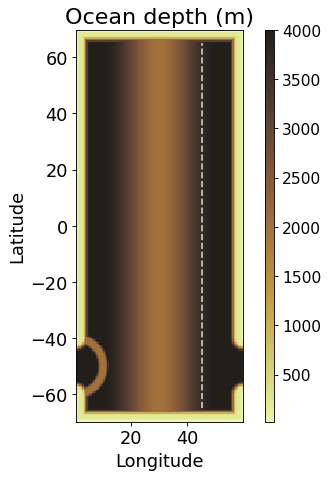

In [5]:
depth=fs_05.depth_ocean
fig = plt.figure(figsize=(4, 7), dpi= 80, facecolor='w', edgecolor='k')
ax1 = fig.add_axes([0.15,0.2,0.6,0.7]) 
ax2 = fig.add_axes([.78, 0.2, 0.03, 0.7])
ax1.set_facecolor((0.92, 0.92, 0.92))
ax1.set_title('Ocean depth (m)',fontsize=20)
ax1.set_xlabel('Longitude',fontsize=16)
ax1.set_ylabel('Latitude',fontsize=16)
ax1.tick_params(labelsize=16); 
ax2.tick_params(labelsize=14)

plotted =ax1.pcolor(xh,yh,depth,cmap=cmocean.cm.turbid)
ax1.plot([45.25,45.25],[-65,65],'--',color=[0.8, 0.8, 0.8])
ax1.set_aspect('equal', 'box')
cbar = plt.colorbar(mappable=plotted, cax=ax2, orientation = 'vertical');
cbar.ax.tick_params(labelsize=14);
#
plt.show()
#fig.savefig('topography.png')